## Visualizing Class Probabilities against Features

### Demo: Visualizing delay probability against day of week and time of day

In [1]:
%matplotlib inline
import pandas as pd
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/flight_delays.csv')
df = df.loc[df.DEP_DEL15.notnull()]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458311 entries, 0 to 469967
Data columns (total 15 columns):
DAY_OF_MONTH             458311 non-null int64
DAY_OF_WEEK              458311 non-null int64
FL_DATE                  458311 non-null object
UNIQUE_CARRIER           458311 non-null object
AIRLINE_ID               458311 non-null int64
CARRIER                  458311 non-null object
ORIGIN_AIRPORT_ID        458311 non-null int64
ORIGIN_AIRPORT_SEQ_ID    458311 non-null int64
ORIGIN_CITY_MARKET_ID    458311 non-null int64
DEST_AIRPORT_ID          458311 non-null int64
DEST_AIRPORT_SEQ_ID      458311 non-null int64
DEST_CITY_MARKET_ID      458311 non-null int64
CRS_DEP_TIME             458311 non-null int64
DEP_TIME                 458311 non-null float64
DEP_DEL15                458311 non-null float64
dtypes: float64(2), int64(10), object(3)
memory usage: 55.9+ MB


In [4]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,DEP_DEL15
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,900,855.0,0.0
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,900,856.0,0.0
2,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,1230,1226.0,0.0
3,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,1220,1214.0,0.0
4,1,4,2015-01-01,AA,19805,AA,11298,1129803,30194,12173,1217302,32134,1305,1754.0,1.0


In [5]:
# df['month'] = df.FL_DATE.apply(lambda x: pd.to_datetime(x).month)
df.FL_DATE = pd.to_datetime(df.FL_DATE)
df.info()
# df.mont

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458311 entries, 0 to 469967
Data columns (total 15 columns):
DAY_OF_MONTH             458311 non-null int64
DAY_OF_WEEK              458311 non-null int64
FL_DATE                  458311 non-null datetime64[ns]
UNIQUE_CARRIER           458311 non-null object
AIRLINE_ID               458311 non-null int64
CARRIER                  458311 non-null object
ORIGIN_AIRPORT_ID        458311 non-null int64
ORIGIN_AIRPORT_SEQ_ID    458311 non-null int64
ORIGIN_CITY_MARKET_ID    458311 non-null int64
DEST_AIRPORT_ID          458311 non-null int64
DEST_AIRPORT_SEQ_ID      458311 non-null int64
DEST_CITY_MARKET_ID      458311 non-null int64
CRS_DEP_TIME             458311 non-null int64
DEP_TIME                 458311 non-null float64
DEP_DEL15                458311 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(10), object(2)
memory usage: 55.9+ MB


In [6]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,CRS_DEP_TIME,DEP_TIME,DEP_DEL15
0,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,900,855.0,0.0
1,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,900,856.0,0.0
2,1,4,2015-01-01,AA,19805,AA,12478,1247802,31703,12892,1289203,32575,1230,1226.0,0.0
3,1,4,2015-01-01,AA,19805,AA,12892,1289203,32575,12478,1247802,31703,1220,1214.0,0.0
4,1,4,2015-01-01,AA,19805,AA,11298,1129803,30194,12173,1217302,32134,1305,1754.0,1.0


In [7]:
df = pd.get_dummies(df, columns=['CARRIER', 'DAY_OF_WEEK'], 
                    drop_first=True) # Adding carrier dummies
# df = df.join(pd.get_dummies(df[], prefix='dow')) # Adding dow dummies

In [12]:
df.head()

,DAY_OF_MONTH,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,...,CARRIER_UA,CARRIER_US,CARRIER_VX,CARRIER_WN,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7
0,1,2015-01-01,AA,19805,12478,1247802,31703,12892,1289203,32575,...,0,0,0,0,0,0,1,0,0,0
1,1,2015-01-01,AA,19805,12892,1289203,32575,12478,1247802,31703,...,0,0,0,0,0,0,1,0,0,0
2,1,2015-01-01,AA,19805,12478,1247802,31703,12892,1289203,32575,...,0,0,0,0,0,0,1,0,0,0
3,1,2015-01-01,AA,19805,12892,1289203,32575,12478,1247802,31703,...,0,0,0,0,0,0,1,0,0,0
4,1,2015-01-01,AA,19805,11298,1129803,30194,12173,1217302,32134,...,0,0,0,0,0,0,1,0,0,0


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 458311 entries, 0 to 469967
Data columns (total 32 columns):
DAY_OF_MONTH             458311 non-null int64
FL_DATE                  458311 non-null datetime64[ns]
UNIQUE_CARRIER           458311 non-null object
AIRLINE_ID               458311 non-null int64
ORIGIN_AIRPORT_ID        458311 non-null int64
ORIGIN_AIRPORT_SEQ_ID    458311 non-null int64
ORIGIN_CITY_MARKET_ID    458311 non-null int64
DEST_AIRPORT_ID          458311 non-null int64
DEST_AIRPORT_SEQ_ID      458311 non-null int64
DEST_CITY_MARKET_ID      458311 non-null int64
CRS_DEP_TIME             458311 non-null int64
DEP_TIME                 458311 non-null float64
DEP_DEL15                458311 non-null int32
CARRIER_AS               458311 non-null uint8
CARRIER_B6               458311 non-null uint8
CARRIER_DL               458311 non-null uint8
CARRIER_EV               458311 non-null uint8
CARRIER_F9               458311 non-null uint8
CARRIER_HA               458311

In [15]:
df.DEP_DEL15.value_counts()

0    367333
1     90978
Name: DEP_DEL15, dtype: int64

In [16]:
df.DEP_DEL15 = df.DEP_DEL15.astype(int)

In [17]:
df.DEP_DEL15.value_counts()

0    367333
1     90978
Name: DEP_DEL15, dtype: int64

In [18]:
df.DEP_DEL15.mean()

0.19850712725638267

#ALSO

#feature = []
#for i in df.columns:
    #if i.startswith('DAY_OF_WEEK'):
        #features.append(i)

In [19]:
#COLLECT THE FEATURES

features = [i for i in df.columns if i.startswith('DAY_OF_WEEK_')]
features += ['CRS_DEP_TIME']
features



['DAY_OF_WEEK_2',
 'DAY_OF_WEEK_3',
 'DAY_OF_WEEK_4',
 'DAY_OF_WEEK_5',
 'DAY_OF_WEEK_6',
 'DAY_OF_WEEK_7',
 'CRS_DEP_TIME']

In [23]:
model = lm.LogisticRegression()
model.fit(df[features], df['DEP_DEL15'])  # df['DEP_DEL15'] is the outcome, e.g. Y variable

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
model_data = df.loc[:, features]
pd.Series(model.predict(model_data)).value_counts()

0    458311
dtype: int64

#prediction vs. probability -- BIAS impacts the level of probability

In [25]:
model.predict_proba(model_data).T

array([[ 0.8708075 ,  0.8708075 ,  0.84189818, ...,  0.86784638,
         0.86411643,  0.85900557],
       [ 0.1291925 ,  0.1291925 ,  0.15810182, ...,  0.13215362,
         0.13588357,  0.14099443]])

In [26]:
model_data['probability'] = model.predict_proba(model_data).T[1]
model_data.head()

,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,CRS_DEP_TIME,probability
0,0,0,1,0,0,0,900,0.129193
1,0,0,1,0,0,0,900,0.129193
2,0,0,1,0,0,0,1230,0.158102
3,0,0,1,0,0,0,1220,0.157153
4,0,0,1,0,0,0,1305,0.165363


In [29]:
model_data.head()

,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,CRS_DEP_TIME,probability
0,0,0,1,0,0,0,900,0.129193
1,0,0,1,0,0,0,900,0.129193
2,0,0,1,0,0,0,1230,0.158102
3,0,0,1,0,0,0,1220,0.157153
4,0,0,1,0,0,0,1305,0.165363


Figure how "melt" works for 'CRS_DEP_TIME' and 'probability'

In [30]:
model_data = pd.melt(model_data, id_vars=['CRS_DEP_TIME', 'probability'],
    value_vars=[c for c in model_data.columns if c.startswith('DAY_OF_WEEK')])

model_data = model_data[model_data.value==1]

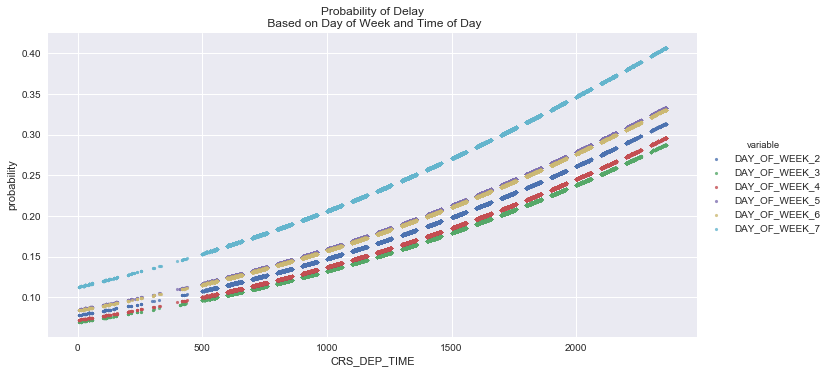

In [31]:
sns.lmplot('CRS_DEP_TIME', 'probability', 
           data=model_data, size=5, aspect=2,
           fit_reg=False, hue='variable',
           scatter_kws={'s': 10, 'marker': '.'})
plt.gca().set(title='Probability of Delay\n Based on Day of Week and Time of Day');

### Practice: visualizing delay (or on-time) probability against time of day and  carrier

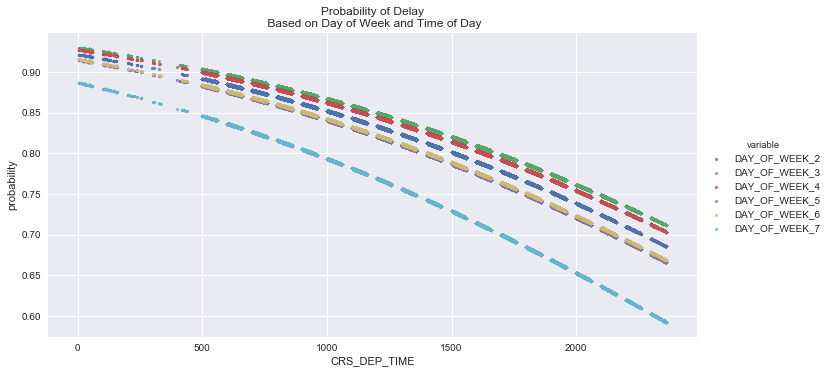

In [39]:
features = [i for i in df.columns if i.startswith('DAY_OF_WEEK')]
features += ['CRS_DEP_TIME']
model_data = df.loc[:, features]

model = lm.LogisticRegression()
model.fit(model_data, df['DEP_DEL15'])

model_data['probability'] = model.predict_proba(model_data).T[0]
model_data = pd.melt(model_data, id_vars=['CRS_DEP_TIME', 'probability'],
    value_vars=[c for c in model_data.columns if c.startswith('DAY_OF_WEEK')])
                     
model_data = model_data[model_data.value==1]

sns.lmplot('CRS_DEP_TIME', 'probability', 
           data=model_data, size=5, aspect=2,
           fit_reg=False, hue='variable',
           scatter_kws={'s': 10, 'marker': '.'})
plt.gca().set(title='Probability of Delay\n Based on Day of Week and Time of Day');

In [45]:
df.head()

,DAY_OF_MONTH,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,...,CARRIER_UA,CARRIER_US,CARRIER_VX,CARRIER_WN,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7
0,1,2015-01-01,AA,19805,12478,1247802,31703,12892,1289203,32575,...,0,0,0,0,0,0,1,0,0,0
1,1,2015-01-01,AA,19805,12892,1289203,32575,12478,1247802,31703,...,0,0,0,0,0,0,1,0,0,0
2,1,2015-01-01,AA,19805,12478,1247802,31703,12892,1289203,32575,...,0,0,0,0,0,0,1,0,0,0
3,1,2015-01-01,AA,19805,12892,1289203,32575,12478,1247802,31703,...,0,0,0,0,0,0,1,0,0,0
4,1,2015-01-01,AA,19805,11298,1129803,30194,12173,1217302,32134,...,0,0,0,0,0,0,1,0,0,0


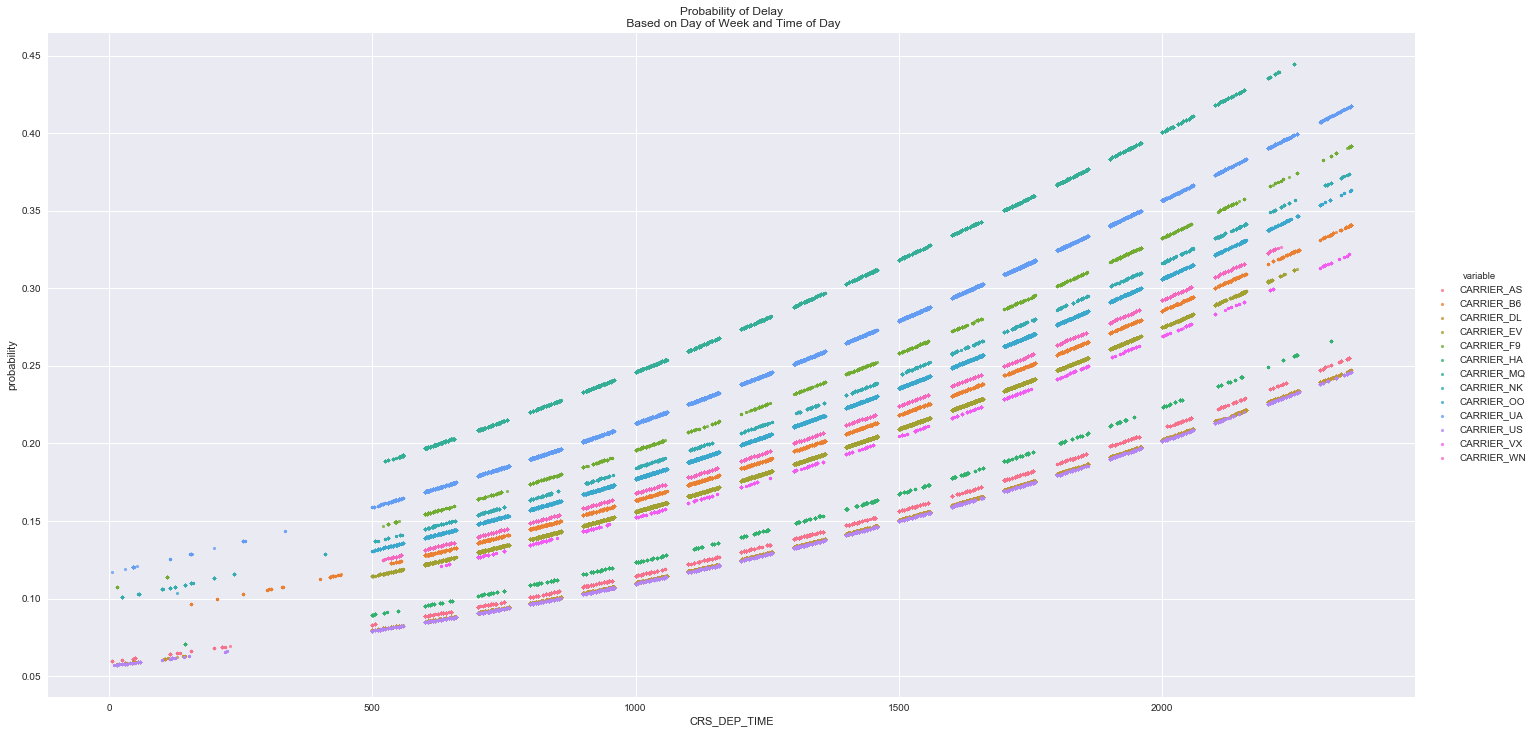

In [67]:
features = [i for i in df.columns if i.startswith('CARRIER')]
features += ['CRS_DEP_TIME']
model_data = df.loc[:, features]

model = lm.LogisticRegression()
model.fit(model_data, df['DEP_DEL15'])

model_data['probability'] = model.predict_proba(model_data).T[1]
model_data = pd.melt(model_data, id_vars=['CRS_DEP_TIME', 'probability'],
    value_vars=[c for c in model_data.columns if c.startswith('CARRIER')])
 
#getting rid of the 0-values from the dummies    
model_data = model_data[model_data.value==1]

sns.lmplot('CRS_DEP_TIME', 'probability', 
           data=model_data, size=10, aspect=2,
           fit_reg=False, hue='variable',
           scatter_kws={'s': 10, 'marker': '.'})
plt.gca().set(title='Probability of Delay\n Based on Day of Week and Time of Day');

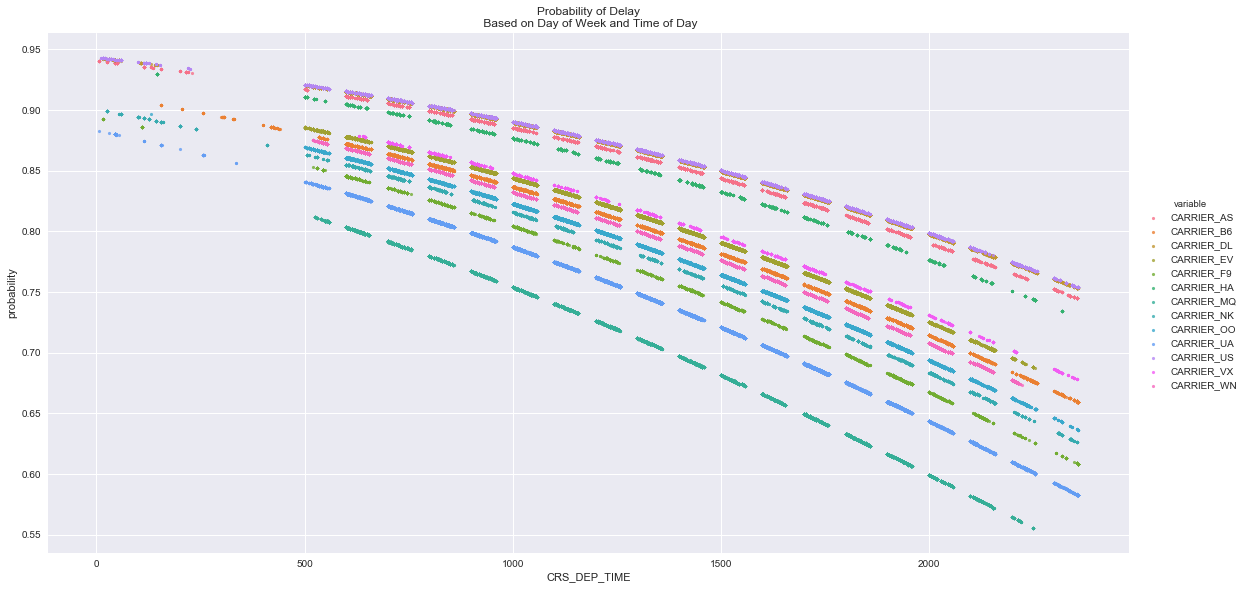

In [68]:
features = [i for i in df.columns if i.startswith('CARRIER')]
features += ['CRS_DEP_TIME']
model_data = df.loc[:, features]

model = lm.LogisticRegression()
model.fit(model_data, df['DEP_DEL15'])

model_data['probability'] = model.predict_proba(model_data).T[0]
model_data = pd.melt(model_data, id_vars=['CRS_DEP_TIME', 'probability'],
    value_vars=[c for c in model_data.columns if c.startswith('CARRIER')])
 
#getting rid of the 0-values from the dummies    
model_data = model_data[model_data.value==1]

sns.lmplot('CRS_DEP_TIME', 'probability', 
           data=model_data, size=8, aspect=2,
           fit_reg=False, hue='variable',
           scatter_kws={'s': 10, 'marker': '.'})
plt.gca().set(title='Probability of Delay\n Based on Day of Week and Time of Day');

## Visualizing Performance Against Baseline

### Visualizing AUC and comparing Models

In [65]:
from sklearn import dummy, metrics

In [80]:
model0 = dummy.DummyClassifier()
model0.fit(df[features[1:]], df['DEP_DEL15'])
df['probability_0'] = model0.predict_proba(df[features[1:]]).T[1]

model1 = lm.LogisticRegression()
model1.fit(df[features[1:]], df['DEP_DEL15'])
df['probability_1'] = model1.predict_proba(df[features[1:]]).T[1]


In [81]:
model0.predict_proba(df[features[1:]]).T

array([[1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [77]:
df.head()

,DAY_OF_MONTH,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,...,CARRIER_VX,CARRIER_WN,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,probability_0,probability_1
0,1,2015-01-01,AA,19805,12478,1247802,31703,12892,1289203,32575,...,0,0,0,0,1,0,0,0,1,0.167168
1,1,2015-01-01,AA,19805,12892,1289203,32575,12478,1247802,31703,...,0,0,0,0,1,0,0,0,1,0.167168
2,1,2015-01-01,AA,19805,12478,1247802,31703,12892,1289203,32575,...,0,0,0,0,1,0,0,0,0,0.202163
3,1,2015-01-01,AA,19805,12892,1289203,32575,12478,1247802,31703,...,0,0,0,0,1,0,0,0,0,0.201026
4,1,2015-01-01,AA,19805,11298,1129803,30194,12173,1217302,32134,...,0,0,0,0,1,0,0,0,1,0.210839


In [78]:
metrics.roc_curve?

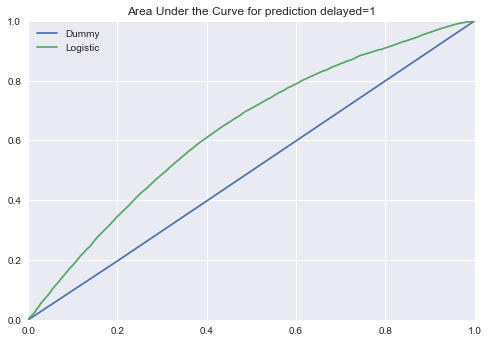

In [82]:
ax = plt.subplot(111)
vals = metrics.roc_curve(df.DEP_DEL15, df.probability_0)
ax.plot(vals[0], vals[1], label='Dummy')

vals = metrics.roc_curve(df.DEP_DEL15, df.probability_1)
ax.plot(vals[0], vals[1], label='Logistic')

ax.set(title='Area Under the Curve for prediction delayed=1', ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1))
ax.legend(loc='upper left', shadow=True);

In [83]:
import numpy as np

0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42


C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99


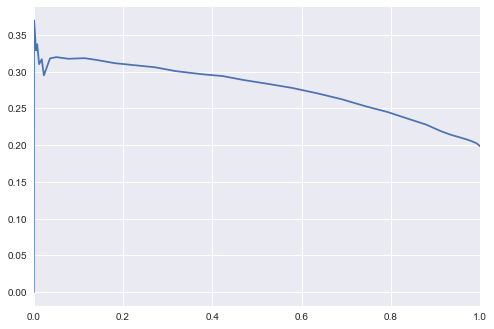

In [85]:
y_true = df.DEP_DEL15

metrics_summary = {}
for threshold in np.arange(0.01, 1, 0.01):
    print (threshold)
    y_pred = df.probability_1.apply(lambda x: 0 if x<= threshold else 1)
    metrics_summary[metrics.recall_score(y_true=y_true, y_pred=y_pred)] = \
    metrics.precision_score(y_true=y_true, y_pred=y_pred)

pd.Series(metrics_summary).plot()

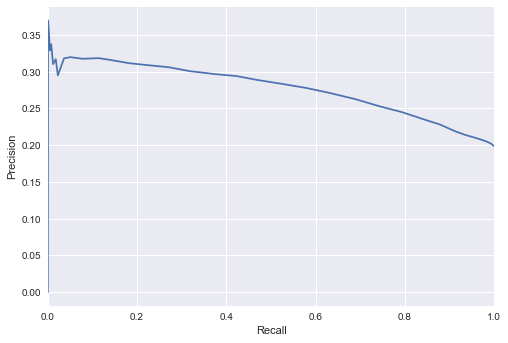

In [98]:
pd.Series(metrics_summary).plot()
plt.xlabel('Recall')
plt.ylabel('Precision')


#### Visualizing Precision / Recall

In [100]:
pd.Series(metrics_summary)

0.000000    0.000000
0.000484    0.369748
0.001539    0.362694
0.004748    0.329018
0.007529    0.337438
0.011827    0.310265
0.017774    0.316997
0.022489    0.294940
0.036240    0.318090
0.050463    0.319819
0.077118    0.317567
0.113731    0.318389
0.140133    0.316000
0.181802    0.311541
0.232287    0.308380
0.271000    0.306045
0.317681    0.300784
0.374860    0.296660
0.423399    0.293990
0.468586    0.288797
0.520752    0.283797
0.579459    0.277814
0.634725    0.270577
0.688826    0.262645
0.744004    0.252781
0.792049    0.245203
0.836917    0.236235
0.878278    0.228129
0.912155    0.219008
0.934402    0.214115
0.952813    0.210893
0.970421    0.207662
0.980896    0.205455
0.992053    0.202478
0.999308    0.198903
0.999604    0.198629
0.999725    0.198587
1.000000    0.198507
dtype: float64

In [99]:
pd.Series(metrics_summary).describe()

count    38.000000
mean      0.266542
std       0.067457
min       0.000000
25%       0.215338
50%       0.286297
75%       0.314885
max       0.369748
dtype: float64

In [101]:
pd.cut(df.DAY_OF_MONTH, bins=3)

0         (0.97, 11.0]
1         (0.97, 11.0]
2         (0.97, 11.0]
3         (0.97, 11.0]
4         (0.97, 11.0]
6         (0.97, 11.0]
7         (0.97, 11.0]
8         (0.97, 11.0]
9         (0.97, 11.0]
10        (0.97, 11.0]
11        (0.97, 11.0]
12        (0.97, 11.0]
13        (0.97, 11.0]
14        (0.97, 11.0]
15        (0.97, 11.0]
16        (0.97, 11.0]
17        (0.97, 11.0]
18        (0.97, 11.0]
19        (0.97, 11.0]
20        (0.97, 11.0]
21        (0.97, 11.0]
22        (0.97, 11.0]
23        (0.97, 11.0]
24        (0.97, 11.0]
26        (0.97, 11.0]
27        (0.97, 11.0]
28        (0.97, 11.0]
29        (0.97, 11.0]
30        (0.97, 11.0]
31        (0.97, 11.0]
              ...     
469938    (21.0, 31.0]
469939    (21.0, 31.0]
469940    (21.0, 31.0]
469941    (21.0, 31.0]
469942    (21.0, 31.0]
469943    (21.0, 31.0]
469944    (21.0, 31.0]
469945    (21.0, 31.0]
469946    (21.0, 31.0]
469947    (21.0, 31.0]
469948    (21.0, 31.0]
469949    (21.0, 31.0]
469950    (

In [107]:
df['DAY_BINS'] = pd.cut(df.DAY_OF_MONTH, bins=3)

In [108]:
df.DAY_BINS.value_counts()

(0.97, 11.0]    164757
(11.0, 21.0]    149839
(21.0, 31.0]    143715
Name: DAY_BINS, dtype: int64

In [113]:
pd.get_dummies(df.DAY_BINS)

,"(0.97, 11.0]","(11.0, 21.0]","(21.0, 31.0]"
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0
10,1,0,0


In [114]:
df.head()

,DAY_OF_MONTH,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,...,CARRIER_WN,DAY_OF_WEEK_2,DAY_OF_WEEK_3,DAY_OF_WEEK_4,DAY_OF_WEEK_5,DAY_OF_WEEK_6,DAY_OF_WEEK_7,probability_0,probability_1,DAY_BINS
0,1,2015-01-01,AA,19805,12478,1247802,31703,12892,1289203,32575,...,0,0,0,1,0,0,0,1,0.167168,"(0.97, 11.0]"
1,1,2015-01-01,AA,19805,12892,1289203,32575,12478,1247802,31703,...,0,0,0,1,0,0,0,1,0.167168,"(0.97, 11.0]"
2,1,2015-01-01,AA,19805,12478,1247802,31703,12892,1289203,32575,...,0,0,0,1,0,0,0,0,0.202163,"(0.97, 11.0]"
3,1,2015-01-01,AA,19805,12892,1289203,32575,12478,1247802,31703,...,0,0,0,1,0,0,0,1,0.201026,"(0.97, 11.0]"
4,1,2015-01-01,AA,19805,11298,1129803,30194,12173,1217302,32134,...,0,0,0,1,0,0,0,0,0.210839,"(0.97, 11.0]"
